In [24]:
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans


In [53]:
# Define the file path
file_path = '../data/cleaned_data.csv'

# Load the cleaned data into a DataFrame
cleaned_df = pd.read_csv(file_path)
cleaned_df.describe

<bound method NDFrame.describe of            Bearer Id            Start  Start ms              End  End ms  \
0       1.304243e+19   4/14/2019 2:11     592.0   4/25/2019 2:26   512.0   
1       1.311448e+19  4/14/2019 12:48     121.0  4/25/2019 10:22   960.0   
2       1.304243e+19   4/15/2019 0:32       0.0   4/25/2019 0:40   284.0   
3       7.277826e+18  4/15/2019 10:30      90.0   4/25/2019 6:14   775.0   
4       1.311448e+19  4/15/2019 11:33     626.0  4/25/2019 18:44   542.0   
...              ...              ...       ...              ...     ...   
146875  7.349883e+18   4/29/2019 7:28     794.0   4/30/2019 0:36   523.0   
146876  1.311448e+19   4/29/2019 7:28     114.0   4/30/2019 7:04   724.0   
146877  1.311448e+19   4/29/2019 7:28      79.0  4/30/2019 18:22   512.0   
146878  1.311448e+19   4/29/2019 7:28      83.0  4/30/2019 15:01   268.0   
146879  1.304243e+19   4/29/2019 7:28     615.0   4/30/2019 0:01   407.0   

        Dur. (ms)          IMSI  MSISDN/Number       

In [71]:
cleaned_df['Total Data Volume (Bytes)'] = cleaned_df['Total UL (Bytes)'] + cleaned_df['Total DL (Bytes)']
cleaned_df['Social Media Data Volume (Bytes)'] = cleaned_df['Social Media UL (Bytes)'] + cleaned_df['Social Media DL (Bytes)']
cleaned_df['Google Data Volume (Bytes)'] = cleaned_df['Google UL (Bytes)'] + cleaned_df['Google DL (Bytes)']
cleaned_df['Email Data Volume (Bytes)'] = cleaned_df['Email UL (Bytes)'] + cleaned_df['Email DL (Bytes)']
cleaned_df['Youtube Data Volume (Bytes)'] = cleaned_df['Youtube UL (Bytes)'] + cleaned_df['Youtube DL (Bytes)']
cleaned_df['Netflix Data Volume (Bytes)'] = cleaned_df['Netflix UL (Bytes)'] + cleaned_df['Netflix DL (Bytes)']
cleaned_df['Gaming Data Volume (Bytes)'] = cleaned_df['Gaming UL (Bytes)'] + cleaned_df['Gaming DL (Bytes)']
cleaned_df['Other Data Volume (Bytes)'] = cleaned_df['Other UL (Bytes)'] + cleaned_df['Other DL (Bytes)']
cleaned_df['Total Data Volume (Bytes)'] = cleaned_df['Total UL (Bytes)'] + cleaned_df['Total DL (Bytes)']

In [55]:
# Select the relevant columns from the cleaned_df DataFrame

df_tele_user_engagement = cleaned_df[['MSISDN/Number', 'Bearer Id', 'Dur. (ms)', 'Total Data Volume (Bytes)']]

# Grouping by 'MSISDN/Number' and aggregating the metrics
df_tele_user_engagement = df_tele_user_engagement.groupby('MSISDN/Number').agg({'Bearer Id': 'count', 'Dur. (ms)': 'sum', 'Total Data Volume (Bytes)': 'sum'})
#Renaming columns:
df_tele_user_engagement = df_tele_user_engagement.rename(
    columns={'Bearer Id': 'xDR Sessions'})
df_tele_user_engagement.head(5)


,xDR Sessions,Dur. (ms),Total Data Volume (Bytes)
MSISDN/Number,,,
3.360304e+10,821,77684980.0,4.111824e+11
3.360304e+10,1,145911.0,6.913349e+08
3.360304e+10,1,98245.0,5.407650e+08
3.360304e+10,1,86350.0,2.796330e+08
3.360304e+10,2,172150.0,1.177222e+09


In [61]:
unique_count = cleaned_df['MSISDN/Number'].nunique()
unique_count

88752

In [63]:
# # Assuming cleaned_df is your DataFrame containing the cleaned data

# # Calculate the session duration for each user
# session_duration = cleaned_df.groupby('Bearer Id')['Dur. (ms)'].sum()

# # Display the session duration for each user
# print(session_duration)


Bearer Id
6.917538e+18     24534.0
6.917538e+18     21489.0
6.917538e+18     27786.0
6.917538e+18     15635.0
6.917538e+18     24264.0
                  ...   
1.318654e+19     80024.0
1.318654e+19    145291.0
1.318654e+19     86399.0
1.318654e+19     86399.0
1.318654e+19    103113.0
Name: Dur. (ms), Length: 133236, dtype: float64


In [60]:
# # Assuming cleaned_df is your DataFrame containing the cleaned data
# # Replace 'cleaned_df' with the actual name of your DataFrame

# # Calculate the total traffic (download and upload bytes) for each user
# cleaned_df['Total Traffic (Bytes)'] = cleaned_df['Total DL (Bytes)'] + cleaned_df['Total UL (Bytes)']
# total_traffic_per_user = cleaned_df.groupby('MSISDN/Number')['Total Traffic (Bytes)'].sum()

# # Display the total traffic for each user
# print(total_traffic_per_user)


MSISDN/Number
3.360304e+10    4.111824e+11
3.360304e+10    6.913349e+08
3.360304e+10    5.407650e+08
3.360304e+10    2.796330e+08
3.360304e+10    1.177222e+09
                    ...     
3.370000e+10    8.274129e+08
3.370000e+10    5.844009e+08
3.370000e+10    4.810664e+08
3.370000e+10    3.947535e+08
3.373168e+10    1.131959e+13
Name: Total Traffic (Bytes), Length: 88752, dtype: float64


In [64]:
# Assuming cleaned_df is your DataFrame containing the cleaned data
# Replace 'cleaned_df' with the actual name of your DataFrame

# Calculate the engagement metrics per customer ID
engagement_metrics = cleaned_df.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',  # Calculate total session duration
    'Total Traffic (Bytes)': 'sum',  # Calculate total traffic
    'Bearer Id': 'count'  # Count the number of sessions
})

# Rename the columns for clarity
engagement_metrics.columns = ['Total Duration', 'Total Traffic', 'Session Frequency']

# Report the top 10 customers per engagement metric
top_10_duration = engagement_metrics['Total Duration'].nlargest(10)
top_10_traffic = engagement_metrics['Total Traffic'].nlargest(10)
top_10_frequency = engagement_metrics['Session Frequency'].nlargest(10)

# Display the top 10 customers per engagement metric
print("Top 10 customers by total duration:")
print(top_10_duration)
print("\nTop 10 customers by total traffic:")
print(top_10_traffic)
print("\nTop 10 customers by session frequency:")
print(top_10_frequency)


Top 10 customers by total duration:
MSISDN/Number
3.373168e+10    2.336556e+09
3.360304e+10    7.768498e+07
3.362578e+10    4.137980e+06
3.362632e+10    4.006981e+06
3.361489e+10    3.899959e+06
3.365973e+10    3.492308e+06
3.367588e+10    3.331961e+06
3.366716e+10    3.113899e+06
3.360313e+10    2.855249e+06
3.362708e+10    2.782170e+06
Name: Total Duration, dtype: float64

Top 10 customers by total traffic:
MSISDN/Number
3.373168e+10    1.131959e+13
3.360304e+10    4.111824e+11
3.361489e+10    8.846226e+09
3.362578e+10    8.499621e+09
3.362632e+10    7.971167e+09
3.367588e+10    7.891111e+09
3.365973e+10    7.705863e+09
3.366646e+10    7.308501e+09
3.366471e+10    6.872336e+09
3.369879e+10    6.540899e+09
Name: Total Traffic, dtype: float64

Top 10 customers by session frequency:
MSISDN/Number
3.373168e+10    22963
3.360304e+10      821
3.362632e+10       18
3.361489e+10       17
3.362578e+10       17
3.365973e+10       16
3.367588e+10       15
3.366716e+10       13
3.360313e+10     

In [44]:
engagement_metrics

,Total Duration,Total Traffic,Session Frequency,Cluster
MSISDN/Number,,,,
3.360304e+10,7.768498e+07,4.111824e+11,821,2
3.360304e+10,1.459110e+05,6.913349e+08,1,0
3.360304e+10,9.824500e+04,5.407650e+08,1,0
3.360304e+10,8.635000e+04,2.796330e+08,1,0
3.360304e+10,1.721500e+05,1.177222e+09,2,0
...,...,...,...,...
3.370000e+10,1.716720e+05,8.274129e+08,1,0
3.370000e+10,9.498000e+03,5.844009e+08,1,0
3.370000e+10,6.604500e+04,4.810664e+08,1,0


In [65]:
# Assuming engagement_metrics is a DataFrame containing the engagement metrics per customer ID
# Normalize the engagement metrics
scaler = StandardScaler()
normalized_engagement = scaler.fit_transform(engagement_metrics)
# Run k-means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_clusters = kmeans.fit_predict(normalized_engagement)
# Add the cluster labels to the original DataFrame
engagement_metrics['Cluster'] = engagement_clusters
# Display the clusters
engagement_metrics


,Total Duration,Total Traffic,Session Frequency,Cluster
MSISDN/Number,,,,
3.360304e+10,7.768498e+07,4.111824e+11,821,2
3.360304e+10,1.459110e+05,6.913349e+08,1,0
3.360304e+10,9.824500e+04,5.407650e+08,1,0
3.360304e+10,8.635000e+04,2.796330e+08,1,0
3.360304e+10,1.721500e+05,1.177222e+09,2,0
...,...,...,...,...
3.370000e+10,1.716720e+05,8.274129e+08,1,0
3.370000e+10,9.498000e+03,5.844009e+08,1,0
3.370000e+10,6.604500e+04,4.810664e+08,1,0


In [42]:
normalized_engagement.shape

(88752, 4)

In [66]:
engagement_clusters

array([2, 0, 0, ..., 0, 0, 1], dtype=int32)

In [67]:
engagement_metrics['Cluster'].value_counts()

Cluster
0    88750
2        1
1        1
Name: count, dtype: int64

In [68]:

# Group the data by cluster and calculate the metrics
cluster_summary = engagement_metrics.groupby('Cluster').agg({
    'Total Duration': ['min', 'max', 'mean', 'sum'],
    'Total Traffic': ['min', 'max', 'mean', 'sum'],
    'Session Frequency': ['min', 'max', 'mean', 'sum']
})

# Display the cluster summary
print(cluster_summary)


        Total Duration                                            \
                   min           max          mean           sum   
Cluster                                                            
0         7.146000e+03  4.137980e+06  1.385949e+05  1.230030e+10   
1         2.336556e+09  2.336556e+09  2.336556e+09  2.336556e+09   
2         7.768498e+07  7.768498e+07  7.768498e+07  7.768498e+07   

        Total Traffic                                            \
                  min           max          mean           sum   
Cluster                                                           
0        3.324901e+07  8.846226e+09  6.883305e+08  6.108933e+13   
1        1.131959e+13  1.131959e+13  1.131959e+13  1.131959e+13   
2        4.111824e+11  4.111824e+11  4.111824e+11  4.111824e+11   

        Session Frequency                               
                      min    max          mean     sum  
Cluster                                                 
0                

## 

In [87]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the engagement metrics
scaler = StandardScaler()
engagement_metrics_standardized = scaler.fit_transform(engagement_metrics)

# Perform k-means clustering
k = 3  # Specify the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(engagement_metrics_standardized)

# Add the cluster labels to the DataFrame
engagement_metrics['Cluster'] = clusters


In [88]:
engagement_metrics

,Total Duration,Total Traffic,Session Frequency,Cluster
MSISDN/Number,,,,
3.360304e+10,7.768498e+07,4.111824e+11,821,2
3.360304e+10,1.459110e+05,6.913349e+08,1,0
3.360304e+10,9.824500e+04,5.407650e+08,1,0
3.360304e+10,8.635000e+04,2.796330e+08,1,0
3.360304e+10,1.721500e+05,1.177222e+09,2,0
...,...,...,...,...
3.370000e+10,1.716720e+05,8.274129e+08,1,0
3.370000e+10,9.498000e+03,5.844009e+08,1,0
3.370000e+10,6.604500e+04,4.810664e+08,1,0


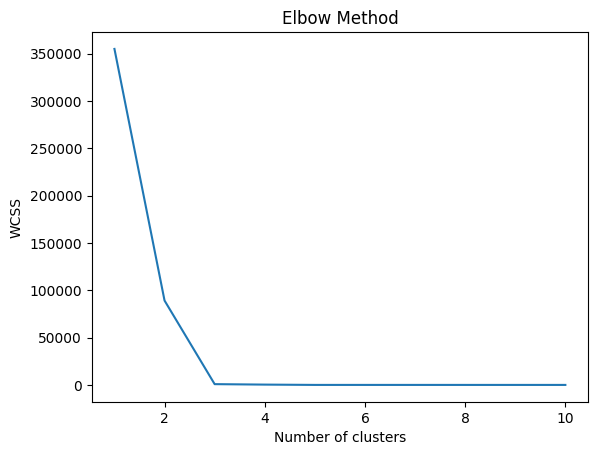

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the within-cluster sum of squares (WCSS) for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(engagement_metrics_standardized)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [69]:
# Assuming cleaned_df is your DataFrame containing the cleaned data
# Replace 'cleaned_df' with the actual name of your DataFrame

# Calculate the total traffic per application for each user
total_traffic_per_user_per_app = cleaned_df.groupby('MSISDN/Number')[['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                                                                   'Google DL (Bytes)', 'Google UL (Bytes)',
                                                                   'Email DL (Bytes)', 'Email UL (Bytes)',
                                                                   'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                                                                   'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                                                                   'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                                                                   'Other DL (Bytes)', 'Other UL (Bytes)']].sum()

# Derive the top 10 most engaged users per application
top_10_users_per_app = {}
for app in total_traffic_per_user_per_app.columns:
    top_10_users_per_app[app] = total_traffic_per_user_per_app[app].nlargest(10)

# Display the top 10 most engaged users per application
for app, top_users in top_10_users_per_app.items():
    print(f"Top 10 most engaged users for {app}:")
    print(top_users)
    print("\n")


Top 10 most engaged users for Social Media DL (Bytes):
MSISDN/Number
3.373168e+10    4.129283e+10
3.360304e+10    1.477482e+09
3.362632e+10    4.274384e+07
3.365973e+10    3.490044e+07
3.361489e+10    2.774974e+07
3.362578e+10    2.656412e+07
3.366716e+10    2.375375e+07
3.360313e+10    2.277668e+07
3.366159e+10    2.207901e+07
3.365936e+10    2.091208e+07
Name: Social Media DL (Bytes), dtype: float64


Top 10 most engaged users for Social Media UL (Bytes):
MSISDN/Number
3.373168e+10    755342615.0
3.360304e+10     26628331.0
3.362632e+10       630942.0
3.362578e+10       571379.0
3.367588e+10       567557.0
3.361489e+10       544800.0
3.365973e+10       511914.0
3.366716e+10       494097.0
3.365836e+10       420146.0
3.365936e+10       409564.0
Name: Social Media UL (Bytes), dtype: float64


Top 10 most engaged users for Google DL (Bytes):
MSISDN/Number
3.373168e+10    1.323409e+11
3.360304e+10    4.768110e+09
3.362632e+10    1.161065e+08
3.362578e+10    1.079047e+08
3.361489e+10    9

In [73]:
df_tele_user_app_engagement = cleaned_df[['MSISDN/Number', 'Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)',
    'Email Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)',
    'Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)']]


In [83]:
df_tele_user_app=df_tele_user_app_engagement[['Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)',
    'Email Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)',
    'Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)']]


In [80]:
df_tele_user_app_engagement

,MSISDN/Number,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes)
0,3.373168e+10,3161403.0,3872713.0,3500104.0,31924969.0,18933702.0,765055811.0,545316477.0
1,3.369874e+10,372625.0,8902099.0,3380069.0,29297508.0,19054441.0,828219634.0,187669517.0
2,3.365922e+10,1585413.0,8778341.0,766046.0,22911539.0,13185350.0,812946425.0,77671250.0
3,3.366565e+10,2697600.0,6532777.0,3780918.0,21981135.0,26779600.0,574923841.0,110548061.0
4,3.366447e+10,839351.0,8822396.0,2348652.0,19623308.0,20124838.0,505668618.0,538369717.0
...,...,...,...,...,...,...,...,...
146875,3.373168e+10,915749.0,12036660.0,1730617.0,17269104.0,38337514.0,268231454.0,263493166.0
146876,3.373168e+10,1752716.0,7283344.0,954877.0,36814543.0,13742615.0,43581298.0,820617848.0
146877,3.362611e+10,2307959.0,12459876.0,2555578.0,26306531.0,40974659.0,571286842.0,179348636.0
146878,3.364566e+10,892867.0,8922614.0,1565542.0,42219856.0,28354119.0,825524976.0,792559807.0


In [76]:
youtube = df_tele_user_app_engagement.nlargest(10, "Youtube Data Volume (Bytes)")['Youtube Data Volume (Bytes)']
netflix = df_tele_user_app_engagement.nlargest(10, "Netflix Data Volume (Bytes)")['Netflix Data Volume (Bytes)']
gaming = df_tele_user_app_engagement.nlargest(10, "Gaming Data Volume (Bytes)")['Gaming Data Volume (Bytes)']
email = df_tele_user_app_engagement.nlargest(10, "Email Data Volume (Bytes)")['Email Data Volume (Bytes)']
google = df_tele_user_app_engagement.nlargest(10, "Google Data Volume (Bytes)")['Google Data Volume (Bytes)']
social_media = df_tele_user_app_engagement.nlargest(10, "Social Media Data Volume (Bytes)")['Social Media Data Volume (Bytes)']
other = df_tele_user_app_engagement.nlargest(10, "Other Data Volume (Bytes)")['Other Data Volume (Bytes)']


In [78]:
youtube

64920     45190078.0
99639     45179008.0
15136     45170035.0
105101    45162724.0
132185    45158398.0
115383    45110515.0
44082     45108826.0
131660    45104757.0
13386     45093369.0
66634     45091533.0
Name: Youtube Data Volume (Bytes), dtype: float64

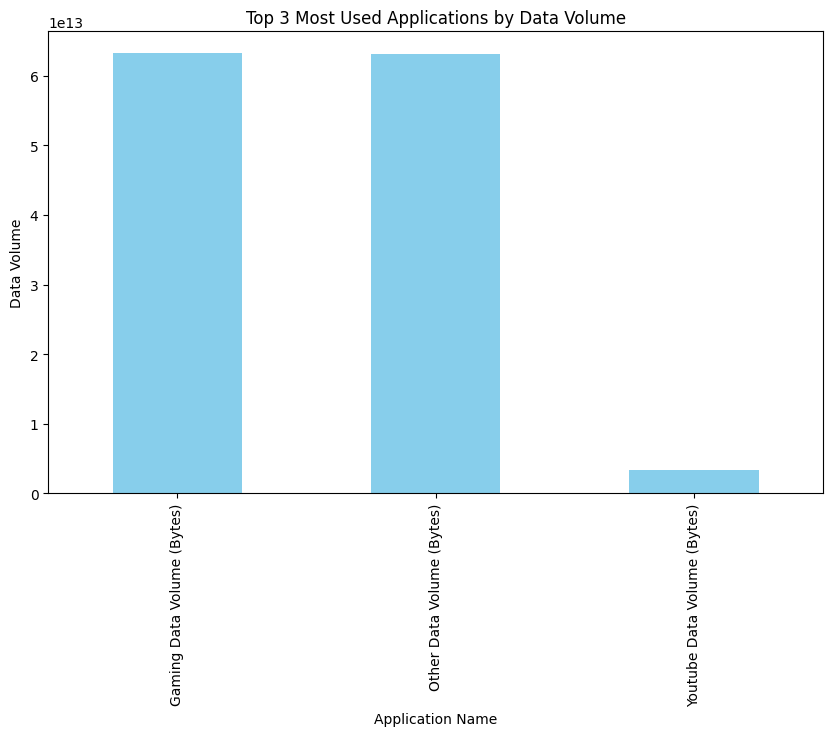

In [84]:
import matplotlib.pyplot as plt

# Calculate the total data volume for each application
total_data_volume = df_tele_user_app.sum()

# Select the top 3 most used applications
top_3_apps = total_data_volume.nlargest(3)

# Create a bar plot to visualize the top 3 most used applications
plt.figure(figsize=(10, 6))
top_3_apps.plot(kind='bar', color='skyblue')
plt.title('Top 3 Most Used Applications by Data Volume')
plt.xlabel('Application Name')
plt.ylabel('Data Volume')
plt.show()


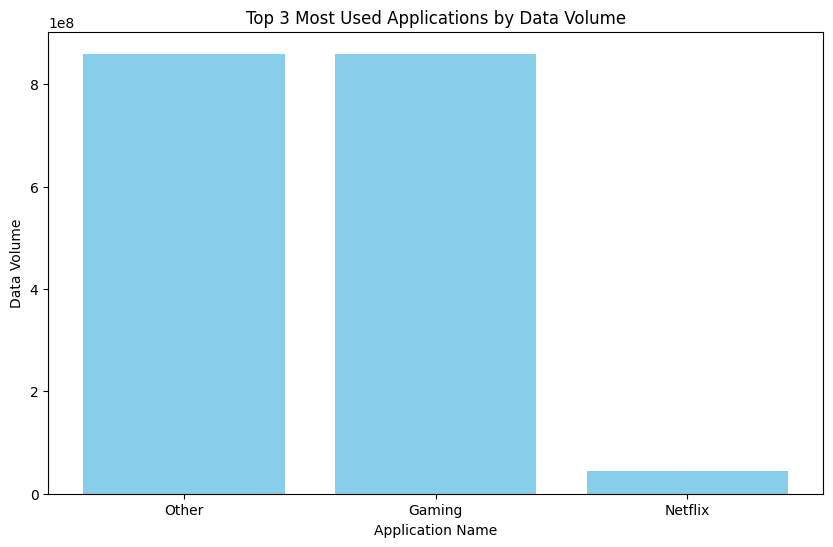

In [81]:
import matplotlib.pyplot as plt

# Data
app_names = ['Youtube', 'Netflix', 'Gaming', 'Email', 'Google', 'Social Media', 'Other']
data_volumes = [youtube.iloc[0], netflix.iloc[0], gaming.iloc[0], email.iloc[0], google.iloc[0], social_media.iloc[0], other.iloc[0]]

# Select the top 3 most used applications
top_3_apps = sorted(zip(app_names, data_volumes), key=lambda x: x[1], reverse=True)[:3]
top_3_app_names = [x[0] for x in top_3_apps]
top_3_data_volumes = [x[1] for x in top_3_apps]

# Create a bar plot to visualize the top 3 most used applications
plt.figure(figsize=(10, 6))
plt.bar(top_3_app_names, top_3_data_volumes, color='skyblue')
plt.title('Top 3 Most Used Applications by Data Volume')
plt.xlabel('Application Name')
plt.ylabel('Data Volume')
plt.show()


In [79]:
# Assuming total_traffic_per_app is a Series containing the total traffic for each application

# Select the top 3 most used applications
top_3_most_used = df_tele_user_app_engagement.nlargest(3,'columns=')

# Create a bar plot to visualize the top 3 most used applications
plt.figure(figsize=(10, 6))
top_3_most_used.plot(kind='bar', color='skyblue')
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application Name')
plt.ylabel('Total Traffic')
plt.show()


TypeError: DataFrame.nlargest() missing 1 required positional argument: 'columns'